In [7]:
import numpy as np
import sympy as sp 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%qtconsole

In [4]:
## Problem 1
# (a) A function for generating a random rotation matrix

def Rx(theta):
    return np.array([[1, 0, 0],
                     [0,np.cos(theta), -np.sin(theta)],
                     [0,np.sin(theta), np.cos(theta)]])
def Ry(theta):
    return np.array([[np.cos(theta), 0, -np.sin(theta)],
                     [0, 1, 0],
                     [np.sin(theta), 0, np.cos(theta)]])
def Rz(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta), np.cos(theta),0],
                     [0,0,1]])
def RR():
    alpha = np.random.rand()*2*np.pi; # Three random angles
    beta = np.random.rand()*2*np.pi;
    gamma = np.random.rand()*2*np.pi;
    R1 = Rx(alpha)                    # Random Rotations about XYZ
    R2 = Ry(beta)
    R3 = Rz(gamma)
    return R1 @ R2 @ R3

In [37]:
# (b) Generating 9 random rotation matricies and finding their determinates

R1 = RR()                    # 9 random rotation matricies
R2 = RR()
R3 = RR()
R4 = RR()                   
R5 = RR()
R6 = RR()
R7 = RR()                   
R8 = RR()
R9 = RR()

det1 = np.linalg.det(R1)    # The determinate of each
det2 = np.linalg.det(R2)
det3 = np.linalg.det(R3)
det4 = np.linalg.det(R4)
det5 = np.linalg.det(R5)
det6 = np.linalg.det(R6)
det7 = np.linalg.det(R7)
det8 = np.linalg.det(R8)
det9 = np.linalg.det(R9)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

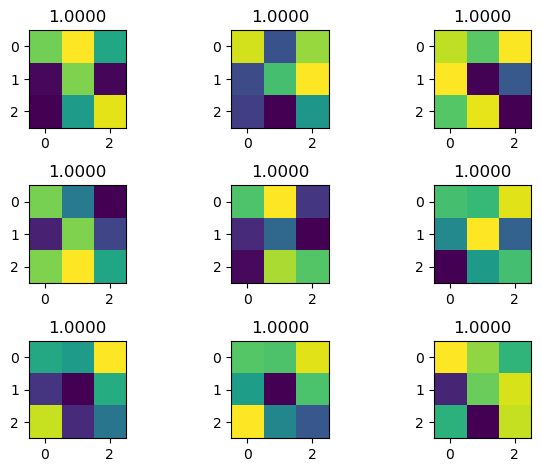

In [39]:
# (c) Plotting the 9 random matricies and titling each plot with the determinate 

fig, ax = plt.subplots(3,3);
ax[0,0].imshow(R1)
ax[0,0].set_title("%.4f" % det1);
ax[1,0].imshow(R2)
ax[1,0].set_title("%.4f" % det2);
ax[2,0].imshow(R3)
ax[2,0].set_title("%.4f" % det3);
ax[0,1].imshow(R4)
ax[0,1].set_title("%.4f" % det4);
ax[1,1].imshow(R5)
ax[1,1].set_title("%.4f" % det5);
ax[2,1].imshow(R6)
ax[2,1].set_title("%.4f" % det6);
ax[0,2].imshow(R7)
ax[0,2].set_title("%.4f" % det7);
ax[1,2].imshow(R8)
ax[1,2].set_title("%.4f" % det8);
ax[2,2].imshow(R9)
ax[2,2].set_title("%.4f" % det9);
fig.tight_layout(pad=1)


In [260]:
## Problem 2
theta = np.random.rand()*2*np.pi
R = Rx(theta)
v = np.random.rand(3,1)
u = R @ v
mag_v = np.linalg.norm(v)
mag_u = np.linalg.norm(u)
mag_u == mag_v

True

In [8]:
## Problem 3
# (a) Function for plotting SE3 transformation matrix

# Generates a random SE3 transformation matrix
def RT():
    R = RR()
    V = np.random.rand(3,1)*2-1
   
    return np.vstack((np.hstack((R,V)),[0,0,0,1]))

# Takes transformation matrix T and plots it 
def plot_SE3(T):
    l = 0.5;
    e1 = T[0:3,0:3] @ np.array([1,0,0]).transpose()
    e2 = T[0:3,0:3] @ np.array([0,1,0]).transpose()
    e3 = T[0:3,0:3] @ np.array([0,0,1]).transpose()
    ax = plt.figure().add_subplot(projection='3d')
    ax.quiver(0,0,0,T[0,3],T[1,3],T[2,3],color="black");
    ax.quiver(T[0,3],T[1,3],T[2,3],e1[0],e1[1],e1[2],color="red",length=l,normalize=True,);
    ax.quiver(T[0,3],T[1,3],T[2,3],e2[0],e2[1],e2[2],color="green",length=l,normalize=True,);
    ax.quiver(T[0,3],T[1,3],T[2,3],e3[0],e3[1],e3[2],color="blue",length=l,normalize=True,);
    ax.set_xlim((-1,1))
    ax.set_ylim((-1,1))
    ax.set_zlim((-1,1))
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([]) 
    return 

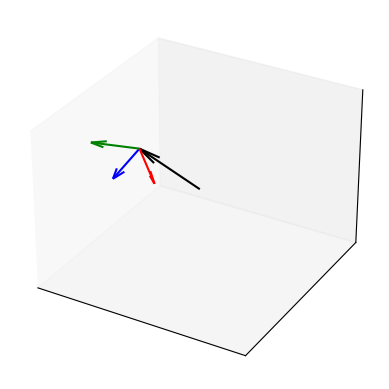

In [9]:
T = RT();
plot_SE3(T)

In [44]:
# (b) Transforming a Vector with T

u = np.vstack([np.random.rand(3,1)*2-1,1]) - np.array([[0],[0],[0],[0]])
v = T @ u 

c = v.transpose() - np.array([T[0,3],T[1,3],T[2,3],0]) # Vector V relative to coordinate frame of T

mag_u = np.linalg.norm(u)
mag_v = np.linalg.norm(c)

mag_u == mag_v

True

In [17]:
## Problem 4
import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi
from sympy import Matrix, diff
(t, 
 alpha, 
 gamma, 
 beta) = symbols("""t, 
                    alpha(t),
                    gamma(t),
                    beta(t)""" , real = True)

theta = Function('theta', real=True)(t)
alpha = Function('alpha', real=True)(t)
beta = Function('beta', real=True)(t)
gamma = Function('gamma', real=True)(t)


def R_x(theta):
    return Matrix([[1, 0, 0],
                   [0, cos(theta), -sin(theta)], 
                   [0, sin(theta), cos(theta)]])

def R_y(theta):
    return Matrix([[cos(theta), 0, -sin(theta)],
                                      [0, 1, 0],
                   [sin(theta), 0, cos(theta)]])
def R_z(theta):
    return Matrix([[cos(theta), -sin(theta), 0], 
                   [sin(theta), cos(theta), 0],
                   [0, 0, 1]])

Matrix([
[-sin(alpha(t))*sin(gamma(t)) + cos(alpha(t))*cos(beta(t))*cos(gamma(t)), -sin(alpha(t))*cos(gamma(t)) - sin(gamma(t))*cos(alpha(t))*cos(beta(t)), -sin(beta(t))*cos(alpha(t))],
[ sin(alpha(t))*cos(beta(t))*cos(gamma(t)) + sin(gamma(t))*cos(alpha(t)), -sin(alpha(t))*sin(gamma(t))*cos(beta(t)) + cos(alpha(t))*cos(gamma(t)), -sin(alpha(t))*sin(beta(t))],
[                                             sin(beta(t))*cos(gamma(t)),                                             -sin(beta(t))*sin(gamma(t)),                cos(beta(t))]])

In [ ]:
R_xyz = R_z(alpha) @ R_y(beta) @ R_z(gamma)
R_z(alpha) @ R_y(beta) @ R_z(gamma)

In [15]:
diff(R_xyz, t)

Matrix([
[-sin(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(alpha(t), t) - sin(alpha(t))*cos(gamma(t))*Derivative(gamma(t), t) - sin(beta(t))*cos(alpha(t))*cos(gamma(t))*Derivative(beta(t), t) - sin(gamma(t))*cos(alpha(t))*cos(beta(t))*Derivative(gamma(t), t) - sin(gamma(t))*cos(alpha(t))*Derivative(alpha(t), t), sin(alpha(t))*sin(gamma(t))*cos(beta(t))*Derivative(alpha(t), t) + sin(alpha(t))*sin(gamma(t))*Derivative(gamma(t), t) + sin(beta(t))*sin(gamma(t))*cos(alpha(t))*Derivative(beta(t), t) - cos(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(gamma(t), t) - cos(alpha(t))*cos(gamma(t))*Derivative(alpha(t), t),  sin(alpha(t))*sin(beta(t))*Derivative(alpha(t), t) - cos(alpha(t))*cos(beta(t))*Derivative(beta(t), t)],
[-sin(alpha(t))*sin(beta(t))*cos(gamma(t))*Derivative(beta(t), t) - sin(alpha(t))*sin(gamma(t))*cos(beta(t))*Derivative(gamma(t), t) - sin(alpha(t))*sin(gamma(t))*Derivative(alpha(t), t) + cos(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(alpha(t), t) + cos(alpha(t))